In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

import numpy as np
import random

In [1]:
# Создаем фигуру и оси
fig, ax = plt.subplots()
fig.patch.set_facecolor('black')
# Сторона квадрата
x = 1.5

# Задаем радиус закругления
border_radius = 0.2
colorlors = ['blue', 'yellow', 'red']
random.shuffle(colorlors)
# Создаем квадраты с закругленными углами и указываем радиус закругления
rounded_square_blue = patches.FancyBboxPatch(
    (-3, 12),
    x+1.5,
    x+1.5,
    boxstyle="round,pad=0.1,rounding_size={}".format(border_radius),
    edgecolor=colorlors[0],
    facecolor=colorlors[0],
    lw=2)
rounded_square_yellow = patches.FancyBboxPatch(
    (5, 5),
    x,
    x,
    boxstyle="round,pad=0.1,rounding_size={}".format(border_radius),
    edgecolor=colorlors[1],
    facecolor=colorlors[1],
    lw=2)
rounded_square_red = patches.FancyBboxPatch(
    (10, -5),
    3*x,
    3*x,
    boxstyle="round,pad=0.1,rounding_size={}".format(border_radius),
    edgecolor=colorlors[2],
    facecolor=colorlors[2],
    lw=2)
random.shuffle(colorlors)
# Создаем пятиугольник с закругленными углами
polygon_blue = patches.RegularPolygon((7, 10),
                                      numVertices=5,
                                      radius=2,
                                      orientation=75,
                                      edgecolor=colorlors[0],
                                      facecolor=colorlors[0],
                                      lw=15,
                                      joinstyle='round')
polygon_yellow = patches.RegularPolygon((-15, -6),
                                        numVertices=5,
                                        radius=1.5,
                                        orientation=-90,
                                        edgecolor=colorlors[1],
                                        facecolor=colorlors[1],
                                        lw=15,
                                        joinstyle='round')
polygon_red = patches.RegularPolygon((0, 0),
                                     numVertices=5,
                                     radius=1.5,
                                     orientation=150,
                                     edgecolor=colorlors[2],
                                     facecolor=colorlors[2],
                                     lw=15,
                                     joinstyle='round')
random.shuffle(colorlors)
# Создаем треугольник с закругленными углами
triangle_blue = patches.RegularPolygon((-7, -2),
                                       numVertices=3,
                                       radius=2.5,
                                       orientation=100,
                                       edgecolor=colorlors[0],
                                       facecolor=colorlors[0],
                                       lw=12,
                                       joinstyle='round')
triangle_yellow = patches.RegularPolygon((12, -9),
                                         numVertices=3,
                                         radius=2,
                                         orientation=120,
                                         edgecolor=colorlors[1],
                                         facecolor=colorlors[1],
                                         lw=12,
                                         joinstyle='round')
triangle_red = patches.RegularPolygon((-8, 8),
                                      numVertices=3,
                                      radius=4,
                                      orientation=45,
                                      edgecolor=colorlors[2],
                                      facecolor=colorlors[2],
                                      lw=12,
                                      joinstyle='round')
random.shuffle(colorlors)
# Создаем круг
circle_blue = plt.Circle((3, -7), 3, color=colorlors[0])
circle_yellow = plt.Circle((-0.6, 5.5), 2.5, color=colorlors[1])
circle_red = plt.Circle((-13, 2), 1.5, color=colorlors[2])

# Добавляем квадраты к осям
ax.add_patch(rounded_square_blue)
ax.add_patch(rounded_square_yellow)
ax.add_patch(rounded_square_red)

# Добавляем пятиугольники
ax.add_patch(polygon_blue)
ax.add_patch(polygon_yellow)
ax.add_patch(polygon_red)

# Добавляем треугольники
ax.add_patch(triangle_blue)
ax.add_patch(triangle_yellow)
ax.add_patch(triangle_red)

# Добавляем окружности
ax.add_patch(circle_blue)
ax.add_patch(circle_yellow)
ax.add_patch(circle_red)

# Устанавливаем пределы осей, чтобы фигура была видна полностью
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)

# Отображаем изображение
plt.axis('equal')
plt.axis('off')
plt.show()

NameError: name 'plt' is not defined

In [6]:
fig.savefig('shapes.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

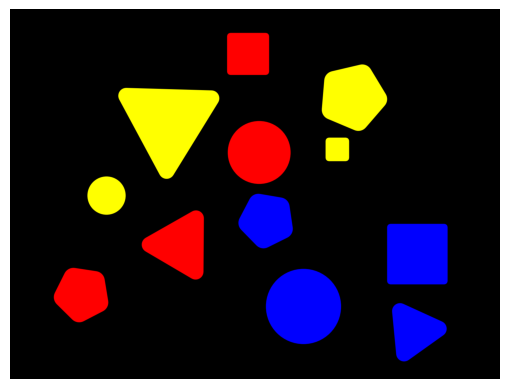

In [7]:
# Загрузка изображения
src = cv2.imread('shapes.png')
img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)


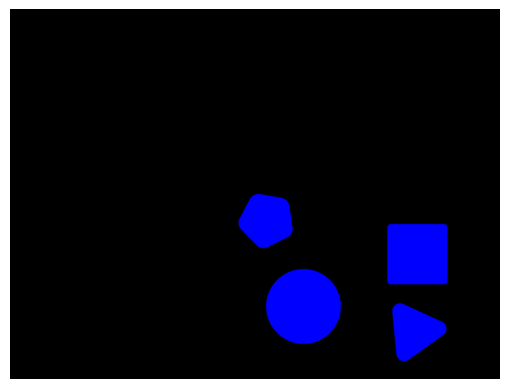

In [8]:
# Выделяем синие объекты на изображении
blue_lower = np.array([0, 0, 255])
blue_higher = np.array([0, 255, 255])
mask = cv2.inRange(img, blue_lower, blue_higher)
selection = cv2.bitwise_and(img, img, mask=mask)
plt.axis('off')
plt.imshow(selection)

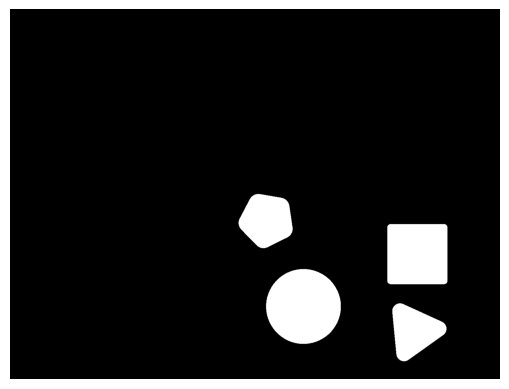

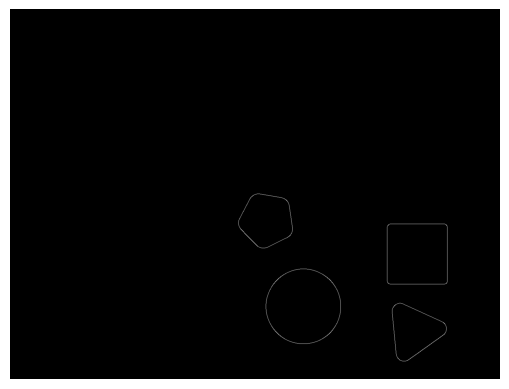

In [9]:
# Преобразуем в ЧБ
gray = cv2.cvtColor(selection, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(gray, cmap='gray')
plt.show()
# Определение границ оператором Кэнни
canny = cv2.Canny(gray, 10, 250)
plt.axis('off')
plt.imshow(canny, cmap='gray')


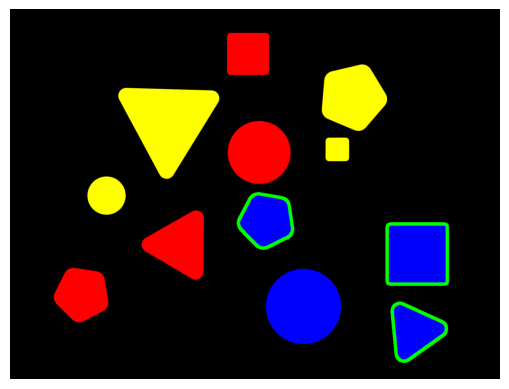

In [20]:
contours = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

for cont in contours:
    #поиск периметра и определение количества углов
    sm = cv2.arcLength(cont, True)
    apd = cv2.approxPolyDP(cont, 0.01*sm, True)
    if len(apd) == 5:
        cv2.drawContours(img, [cont], -1, (0,255,0), 10)
plt.axis('off')
plt.imshow(img)

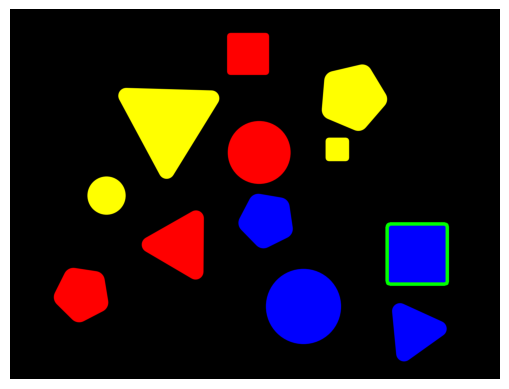

In [10]:
contours = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)[0]
for cont in contours:
    # Определение периметра и аппроксимация контура
    sm = cv2.arcLength(cont, True)
    apd = cv2.approxPolyDP(cont, 0.03 * sm, True)

    # Проверка, является ли контур квадратом
    if len(apd) == 4:
        x, y, w, h = cv2.boundingRect(apd)
        aspect_ratio = float(w) / h
        if aspect_ratio >= 0.95 and aspect_ratio <= 1.05:
            # Проверка углов
            cosines = []
            for i in range(4):
                pt1 = apd[i]
                pt2 = apd[(i + 1) % 4]
                pt0 = apd[(i - 1) % 4]
                v1 = np.array(pt1) - np.array(pt0)
                v2 = np.array(pt2) - np.array(pt1)
                cosine = np.dot(v1.reshape(-1), v2.reshape(-1)) / (
                    np.linalg.norm(v1) * np.linalg.norm(v2))
                angle = np.arccos(cosine)
                cosines.append(angle)
            if all(abs(angle - np.pi / 2) < np.pi / 6 for angle in cosines):
                # Дополнительная проверка на количество углов
                if len(apd) == 4:
                    cv2.drawContours(img, [cont], -1, (0, 255, 0), 10)
plt.axis('off')
plt.imshow(img)